In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1
use pandas library to check the data in the dataset. Process incomplete data point such
as ’NaN’ or ’Null’. Briefly summarize the characteristics of this dataset and guess which is the most
relevant attribute for MEDV.

In [2]:
data = pd.read_csv("boston.csv")

In [3]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
data.isna().sum() #check na

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

__So, here we have no na__

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


1. The variable crim has a large std based on the mean of it, and the max of it is 88.98, but the 75% quantile is at 3.68.
2. The varialbe zn is similar to crim.
3. Chas is a dummy varialbe. From the mean of it, we can see most homes do not at the tract bounds river.
4. The std of variable rm and ptratio is small. These variables are very stable.
5. The 75% quantile of tax is the same as max of it.

So I guess crim, zn, tax are the most related variables to MEDV.

In [7]:
print(data.describe().to_latex())

\begin{tabular}{lrrrrrrrrrrrrrr}
\toprule
{} &        crim &          zn &       indus &        chas &         nox &          rm &         age &         dis &         rad &         tax &     ptratio &           b &       lstat &        medv \\
\midrule
count &  506.000000 &  506.000000 &  506.000000 &  506.000000 &  506.000000 &  506.000000 &  506.000000 &  506.000000 &  506.000000 &  506.000000 &  506.000000 &  506.000000 &  506.000000 &  506.000000 \\
mean  &    3.613524 &   11.363636 &   11.136779 &    0.069170 &    0.554695 &    6.284634 &   68.574901 &    3.795043 &    9.549407 &  408.237154 &   18.455534 &  356.674032 &   12.653063 &   22.532806 \\
std   &    8.601545 &   23.322453 &    6.860353 &    0.253994 &    0.115878 &    0.702617 &   28.148861 &    2.105710 &    8.707259 &  168.537116 &    2.164946 &   91.294864 &    7.141062 &    9.197104 \\
min   &    0.006320 &    0.000000 &    0.460000 &    0.000000 &    0.385000 &    3.561000 &    2.900000 &    1.129600 &    1.000000 

C:\Users\11920\AppData\Local\Temp\ipykernel_30272\2065701587.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(data.describe().to_latex())


# Step 2
use seaborn library to visualize the dataset. Plot the MEDV distributions over each attribute.
Briefly analyze the characteristics of the attributes and revise the assumption in Step 1 if necessary.

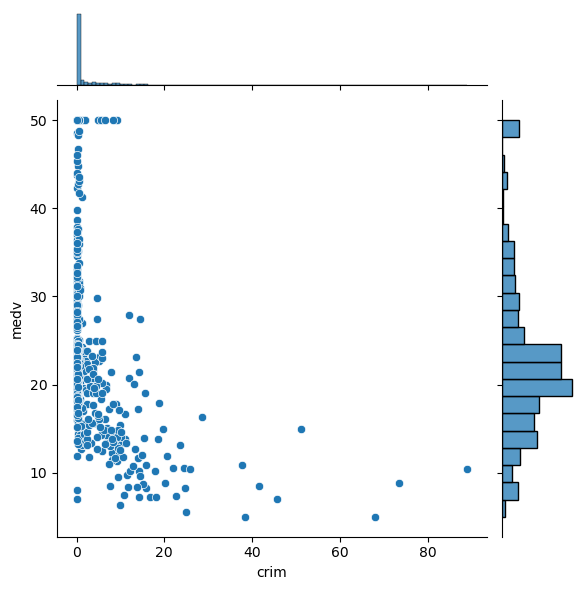

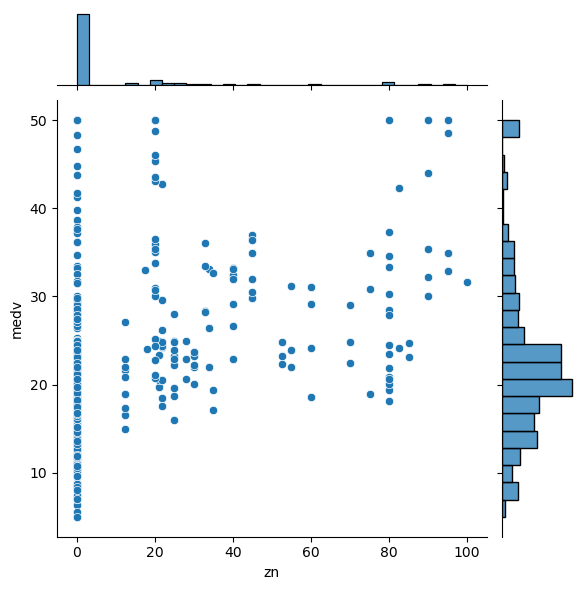

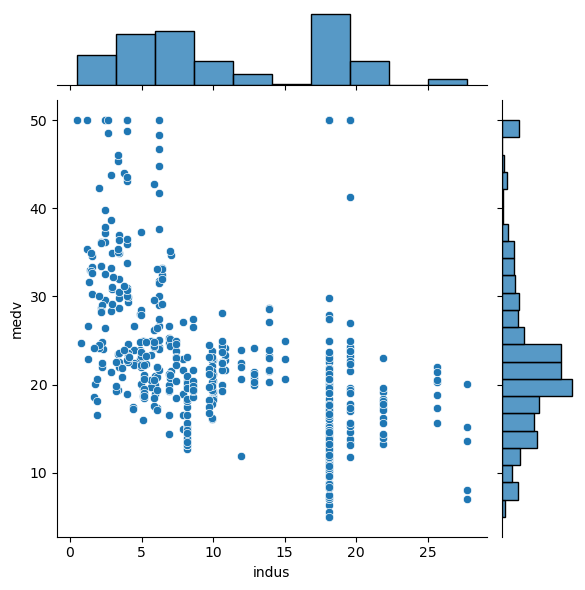

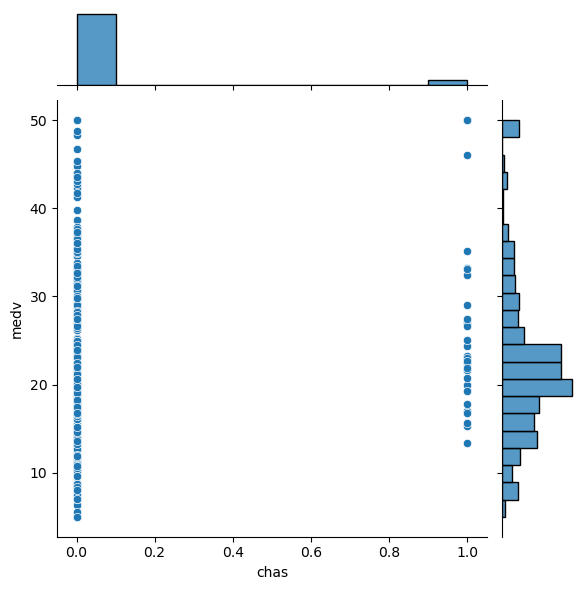

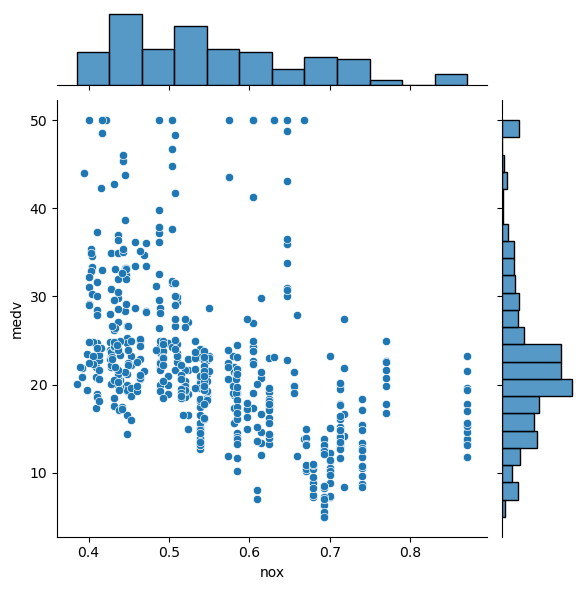

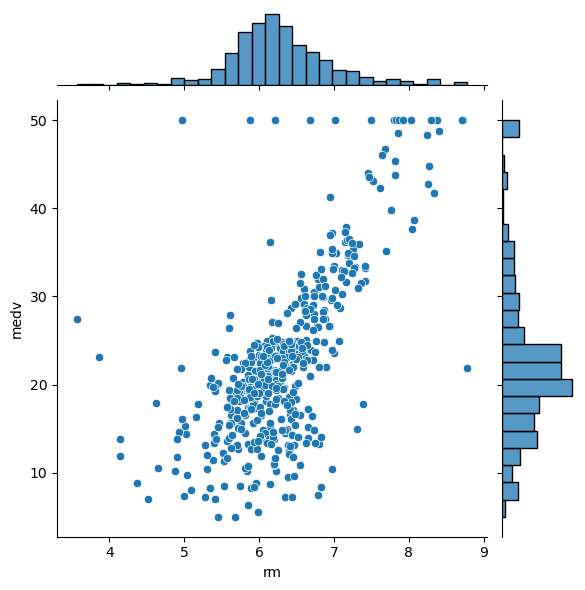

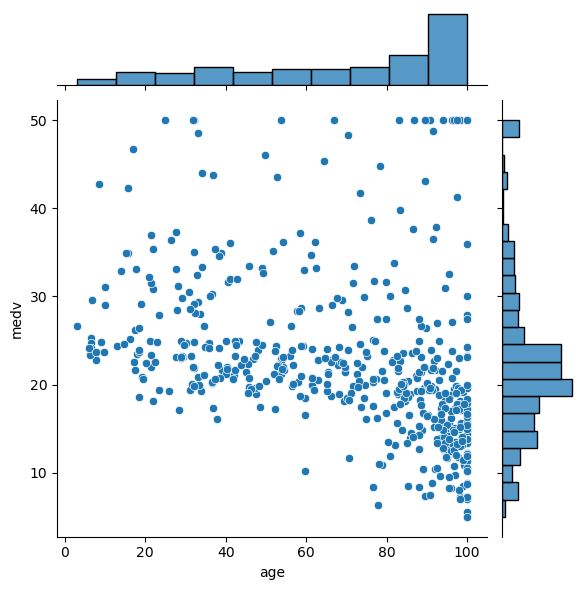

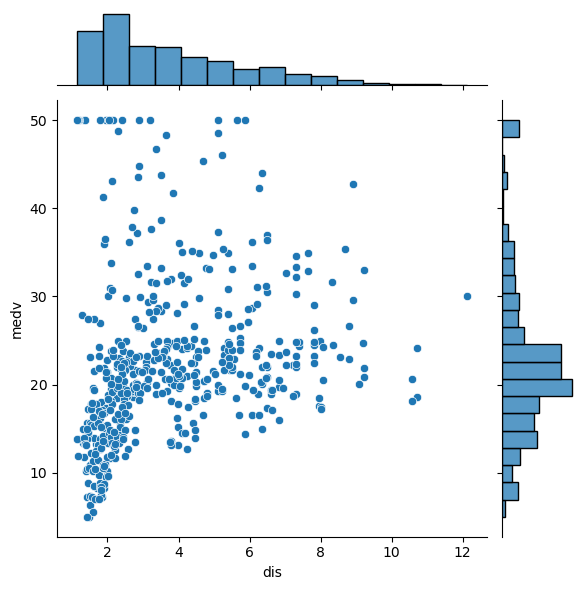

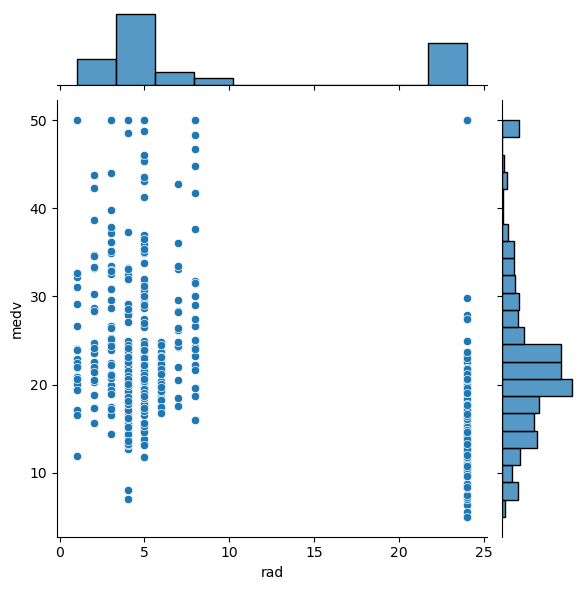

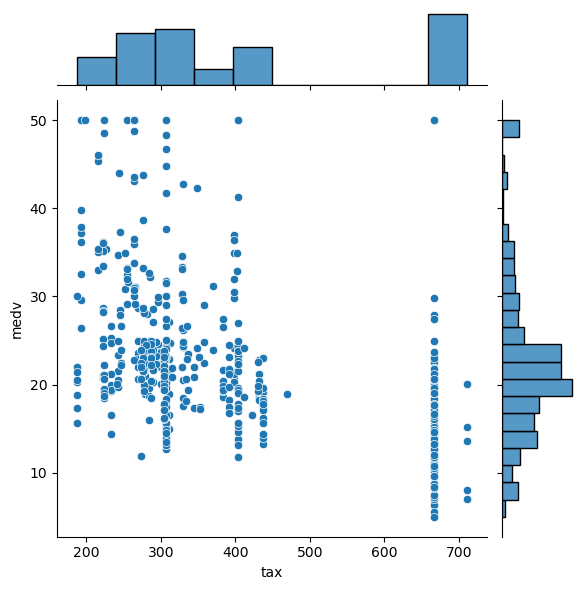

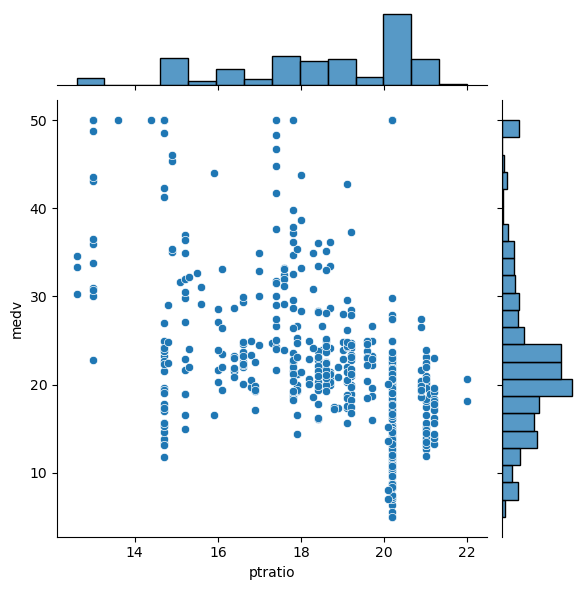

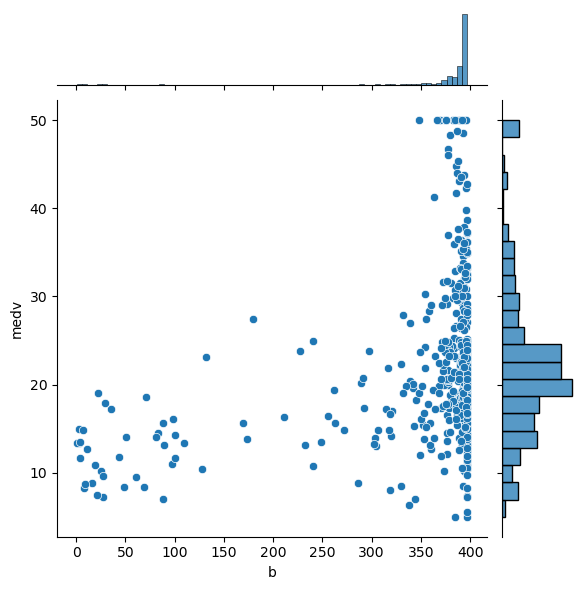

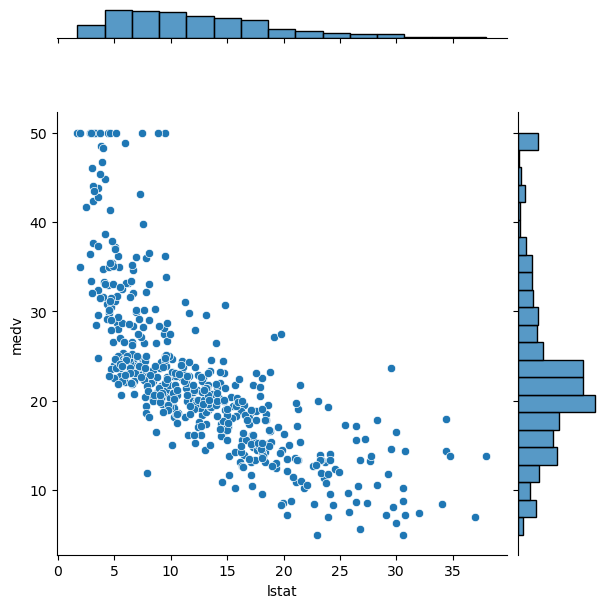

In [8]:
column_sels = ["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "b", "lstat"]
x = data.loc[:,column_sels]
y = data.loc[:, 'medv']
for i, k in enumerate(column_sels):
    sns.jointplot(y=y, x=x[k])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

__After seeing the distribution of this characters, I think indus, nox, rm, dis, lstat are the most related variables to MEDV.__

# Step 3
use seaborn.heatmap function to plot the pairwise correlation on data. Select the good attributes which are good indications of using as predictors. Report your findings

<AxesSubplot: >

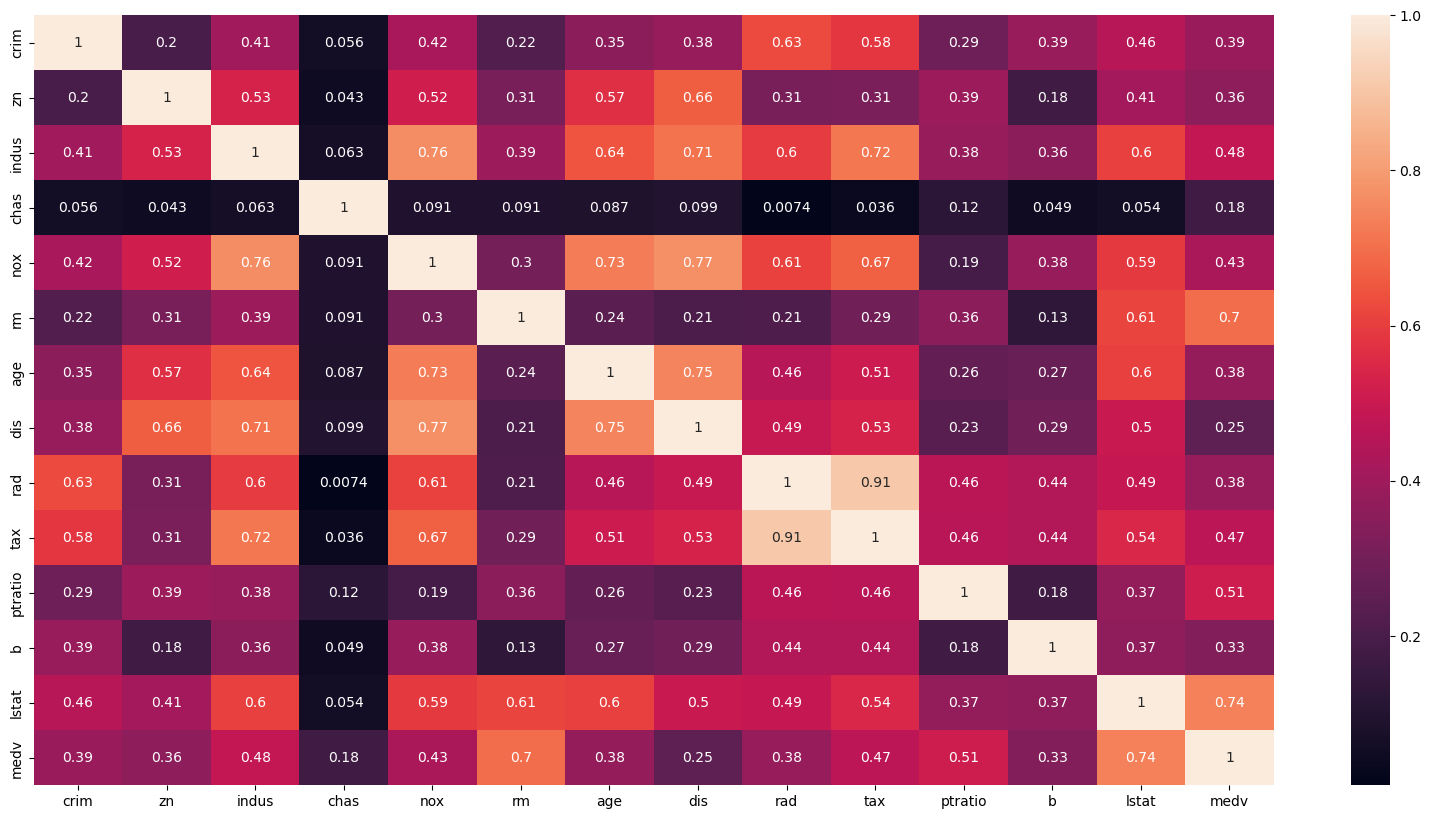

In [9]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

From the heatmap we can see that mehv has strong correlation with indus, nox, rm, tax, ptratio and lstat. They are good indications of using as predictors.

# Step 4
use sklearn.preprocessing.MinMaxScaler function to scale the columns you select in Step 3. Then use seaborn.regplot to plot the relevance of these columns against MEDV with 95% confidence interval.

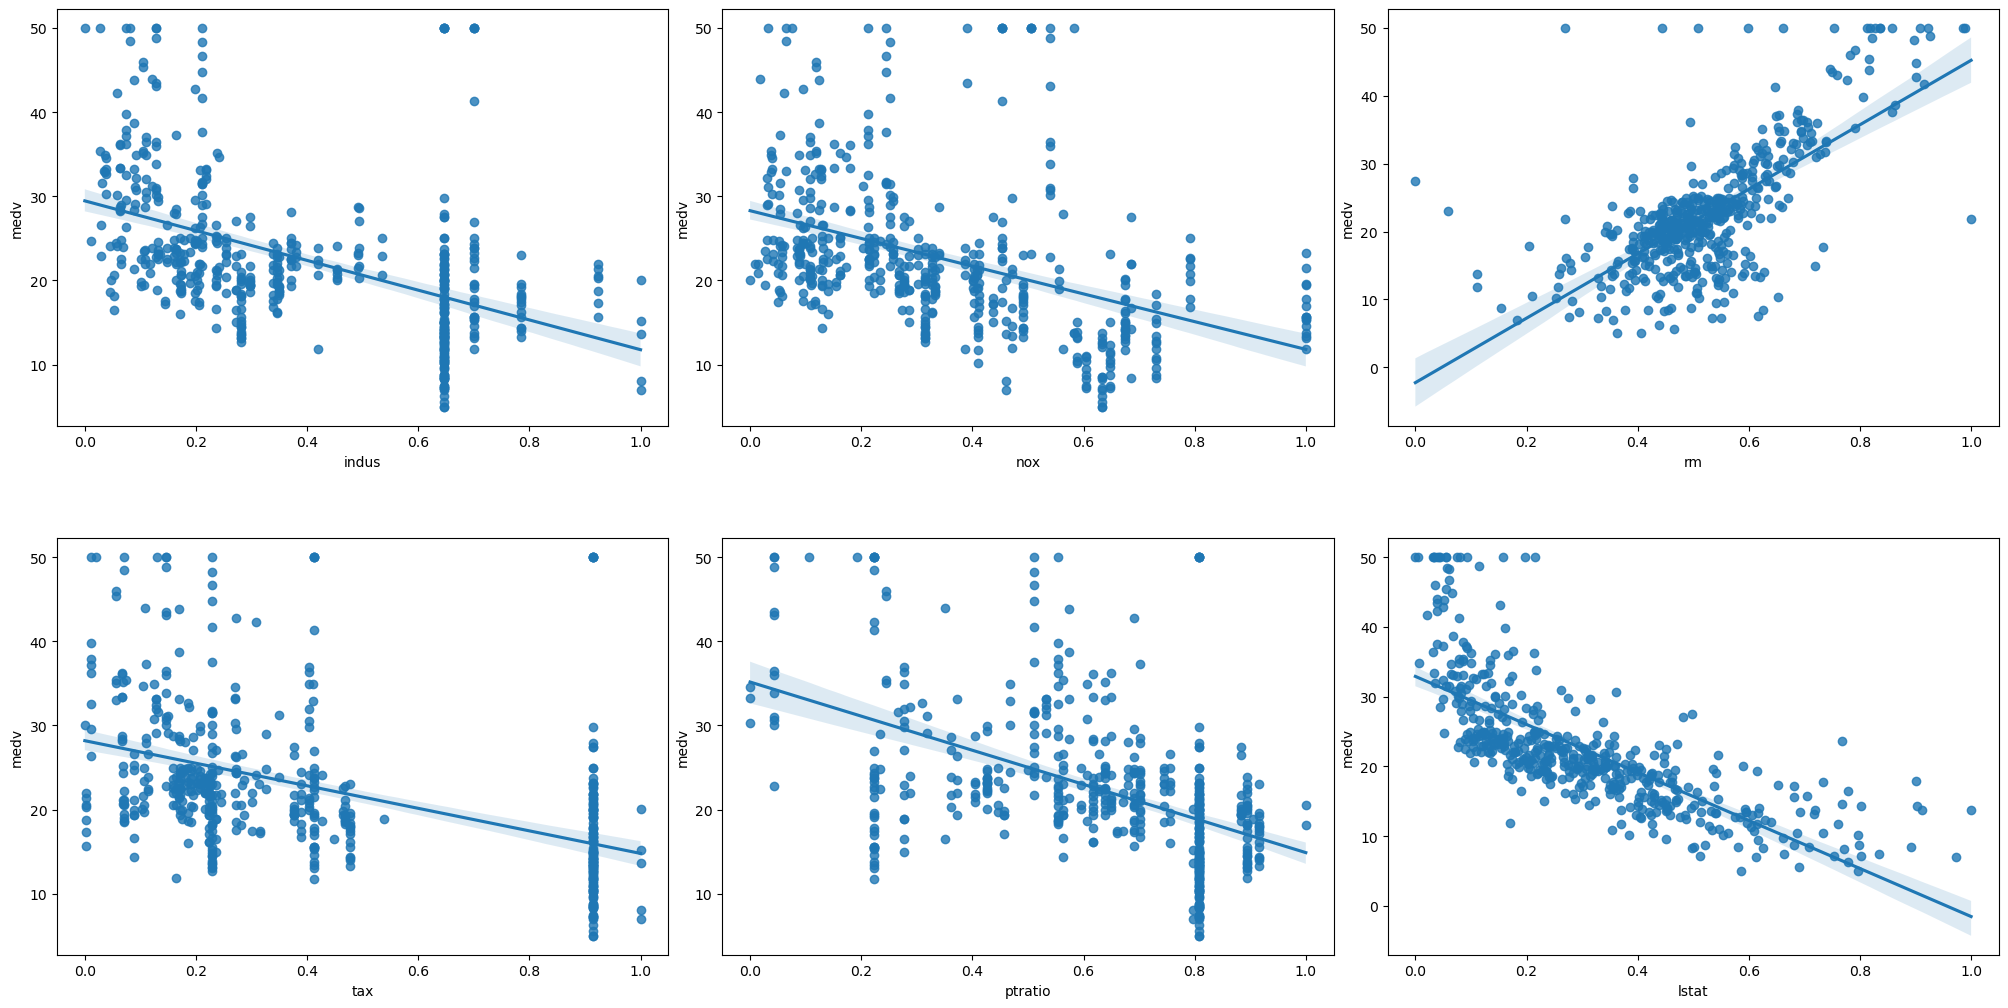

In [10]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
column_sels_again = ["indus", "nox", "rm", "tax", "ptratio", "lstat"]
x = data.loc[:,column_sels_again]
y = data['medv']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels_again)
fig, axs = plt.subplots(ncols = 3, nrows=2, figsize=(20, 10))
axs = axs.flatten()
for i, k in enumerate(column_sels_again):
    sns.regplot(y=y, x=x[k], ax=axs[i], x_ci=0.95)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Step 5
Randomly split the data into two parts, one contains 80% of the samples and the other contains 20% of the samples. Use the first part as training data and train a linear regression model and make prediction on the second part with gradient descent methods. X should be the attributes you select in previous steps. Report the training error and testing error in terms of RMSE. Plot the loss curves in the training process. Notice: you need to write the codes of learning the parameters by yourself. Do not use the regression packages of Sklearn.

In [11]:
from sklearn.model_selection import train_test_split
x.insert(0, "const", [1]*len(x)) # add a column filled with 1s.
y = pd.DataFrame(data=min_max_scaler.fit_transform(y.values.reshape(-1, 1)), columns=['medv'])
X_train, X_test, y_train, y_test = train_test_split(x.values, y.values.flatten(), test_size=0.2, random_state=100)

In [12]:
def computeCost(X, y, w):
    m = y.size
    J = 0
    J = 1 / (2*m) * np.sum(np.square(X.dot(w) - y))
    return J
def gradientDescent(X, y, w, alpha, num_iters):
    m = y.size
    w = w.copy()
    J_history = [] 
    for i in range(num_iters):
        w -= alpha / m * np.sum(X.T.dot((X.dot(w) - y)), axis=0)
        J_history.append(computeCost(X, y, w))
    return w, J_history
def RMSE(X, y, w):
    m = y.size
    return np.sqrt(1/m*np.sum(np.square(X.dot(w) - y)))

Text(0.5, 0, 'iter time')

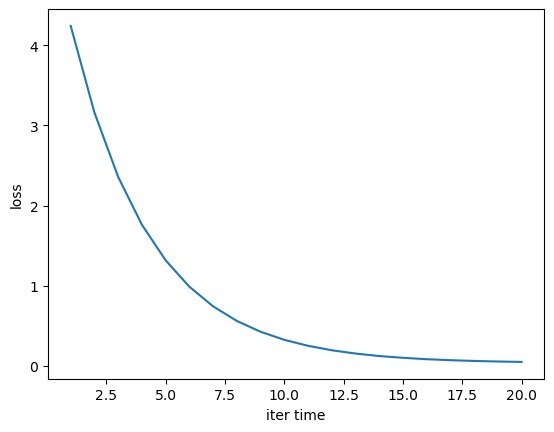

In [13]:
w_init = np.ones(7)
w, J_history = gradientDescent(X_train, y_train, w_init, 0.01, 20)
# Plot the loss curves in the training process.
plt.plot(range(1, len(J_history) + 1), J_history)
plt.ylabel("loss")
plt.xlabel("iter time")

In [14]:
print("training RMSE", RMSE(X_train, y_train, w), "testing RMSE", RMSE(X_test, y_test, w))

training RMSE 0.31776759357483153 testing RMSE 0.3407474271659464


# Step 6
Repeat the splitting, training, and testing for 10 times with different parameters such as step size, iteration steps, etc. Use a loop and print the RMSEs in each trial. Analyze the influence of different parameters on RMSE.

In [15]:
alpha_list = [0.005, 0.01, 0.015, 0.02, 0.025]
num_iters_list = [10, 20]
w_list = []
J_history_list = []

In [16]:
for i in range(5):
    for j in range(2):
        w, J_history = gradientDescent(X_train, y_train, w_init, alpha_list[i], num_iters_list[j])
        w_list.append(w)
        J_history_list.append(J_history)
        print("training RMSE", RMSE(X_train, y_train, w), "testing RMSE", RMSE(X_test, y_test, w))

training RMSE 1.667783741636256 testing RMSE 1.7155933334219609
training RMSE 0.8486241536436409 testing RMSE 0.8828640808478885
training RMSE 0.8077841278067198 testing RMSE 0.8413629246153769
training RMSE 0.31776759357483153 testing RMSE 0.3407474271659464
training RMSE 0.42519931051077997 testing RMSE 0.4520167618344078
training RMSE 0.26865121945099213 testing RMSE 0.2852309706219915
training RMSE 0.2981404262193815 testing RMSE 0.319693920399261
training RMSE 0.2667179738849681 testing RMSE 0.2816459799750157
training RMSE 0.27113038512168525 testing RMSE 0.28865014437448605
training RMSE 0.26666658093354584 testing RMSE 0.28131007939750463


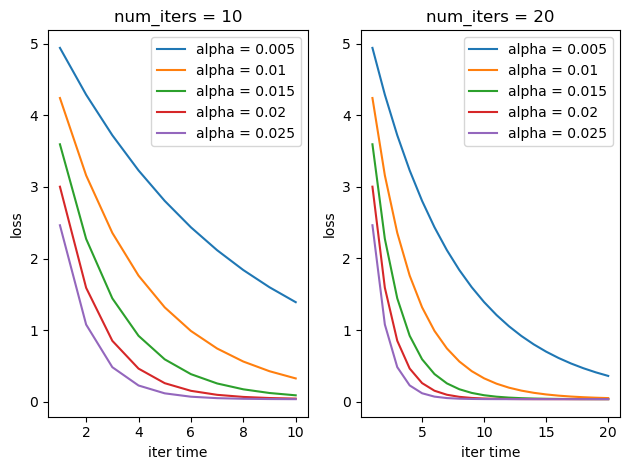

In [17]:
J_history_list_1 = [x for x in J_history_list if len(x) == 10]
J_history_list_2 = [x for x in J_history_list if len(x) == 20]
plt.subplot(1, 2, 1)
for i in J_history_list_1:
    plt.plot(range(1, len(i) + 1), i, label = "alpha = {}".format(alpha_list[J_history_list_1.index(i)]))
    plt.ylabel("loss")
    plt.xlabel("iter time")
    plt.title("num_iters = 10")
plt.legend()
plt.subplot(1, 2, 2)
for i in J_history_list_2:
    plt.plot(range(1, len(i) + 1), i, label = "alpha = {}".format(alpha_list[J_history_list_2.index(i)]))
    plt.ylabel("loss")
    plt.xlabel("iter time")
    plt.title("num_iters = 20")
plt.legend()
plt.tight_layout()
plt.show()

As we can see, most loss functions will converge to a low region. But when $\alpha$ too low and num_iters too low, this train may not be able to make the loss function to the low region.